# TEAM COPPERAJAH FINAL PROJECT

In [ ]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder 
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn import linear_model
from pprint import pprint
%matplotlib inline
pd.options.mode.chained_assignment = None  # default='warn'
import time
import datetime
from datetime import datetime as dt

# DataSets

In [2]:
df_gmsl = pd.read_csv('csiro_alt_gmsl_mo_2015_csv.csv')
df_seasurfacetemp = pd.read_csv('sea-surface.csv')
df_global=pd.read_csv('GlobalTemperatures.csv')
df_bycountry=pd.read_csv('GlobalTemperaturesByCountry.csv')
df_countrycodes=pd.read_csv('countries_codes_and_coordinates.csv')

# Sea Surface Temperature

In [3]:
df_seasurfacetemp['Annual anomaly'] = df_seasurfacetemp['Annual anomaly'].astype('float')
df_seasurfacetemp['Lower 95% confidence interval'] = df_seasurfacetemp['Lower 95% confidence interval'].astype('float')
df_seasurfacetemp['Upper 95% confidence interval'] = df_seasurfacetemp['Upper 95% confidence interval'].astype('float')

In [4]:
df_seasurfacetemp.shape
df_seasurfacetemp.head(5)

Year  Annual anomaly  Lower 95% confidence interval  \
0  1880          -0.420                      -0.628152   
1  1881          -0.330                      -0.531096   
2  1882          -0.348                      -0.545568   
3  1883          -0.456                      -0.650040   
4  1884          -0.582                      -0.790152   

   Upper 95% confidence interval  
0                      -0.211848  
1                      -0.128904  
2                      -0.150432  
3                      -0.261960  
4                      -0.373848

<AxesSubplot:xlabel='Year'>

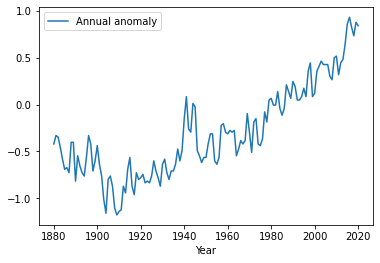

In [5]:
df_seasurfacetemp.plot(x="Year", y=["Annual anomaly"])

In [6]:
x= df_seasurfacetemp["Year"]
y = df_seasurfacetemp["Annual anomaly"]
x=x.values.reshape(141,1)
y=y.values.reshape(141,1)

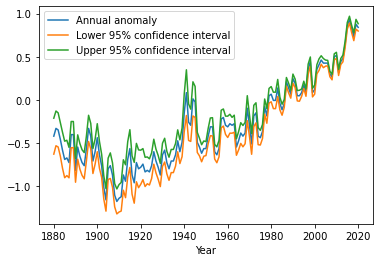

In [7]:
df_seasurfacetemp.plot(x="Year", y=["Annual anomaly", "Lower 95% confidence interval", "Upper 95% confidence interval"])
plt.savefig("cmo2.png", transparent=True,bbox_inches='tight')

# Sea Surface Temperature Regression Analysis

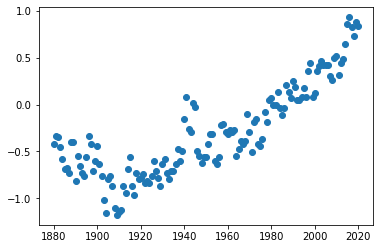

In [8]:
plt.scatter(x,y)

In [9]:

lin=LinearRegression()
lin.fit(x,y)


LinearRegression()

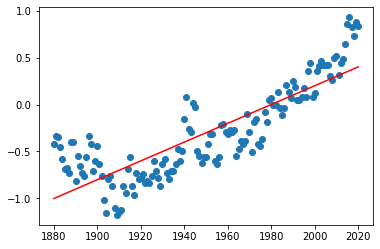

In [10]:
lin.predict(x)
plt.scatter(x,y)
plt.plot(x, lin.predict(x), color="red")

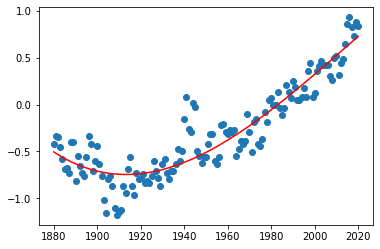

In [11]:
pol=PolynomialFeatures(degree=3)
newx=pol.fit_transform(x)
polmod=LinearRegression()
polmod.fit(newx,y)
polmod.predict(newx)
plt.scatter(x,y)
plt.plot(x,polmod.predict(newx),color="red")

In [12]:
err=0
err2=0
for i in range(len(newx)):
    err2=err2+(float(y [i])-float(polmod.predict(newx)[i]))**2
for i in range (len(y)):
    err=err+(float(y [i])-float(lin.predict(x)[i]))**2
err2
print('Linear Error: ', err)
print('Polynom error: ', err2)

Linear Error:  9.886835481655888
Polynom error:  4.759834747453433


In [13]:
for a in range(90):
    pol=PolynomialFeatures(degree=a)
    newx=pol.fit_transform(x)
    polmod=LinearRegression()
    polmod.fit(newx,y)
    polmod.predict(newx)
    for i in range(len(newx)):
        err2=0
        err2=err2+(float(y [i])-float(polmod.predict(newx)[i]))**2
    print(a+1," value error",err2)#En düşük değeri yani en doğru sonucu bulmak için yapıyoruz

1  value error 1.3004733381620643
2  value error 0.19309348127284864
3  value error 0.0008163415508340776
4  value error 0.012986533541283485
5  value error 0.012791306548425177
6  value error 0.012604463366889453
7  value error 0.012425541354697431
8  value error 0.012253972839738187
9  value error 0.0120892047377558
10  value error 0.011930698078742061
11  value error 0.011777927613516353
12  value error 0.011630381457881957
13  value error 0.011487560787380634
14  value error 0.011348979597053034
15  value error 0.011214164506828083
16  value error 0.011082654622683081
17  value error 0.010954001467646982
18  value error 0.010827768948821039
19  value error 0.010703533399515186
20  value error 0.010580883663458714
21  value error 0.010459421237748567
22  value error 0.01033876046693728
23  value error 0.01021852878510647
24  value error 0.010098367004446386
25  value error 0.00997792965003187
26  value error 0.009856885331752933
27  value error 0.009734917151760907
28  value error 0

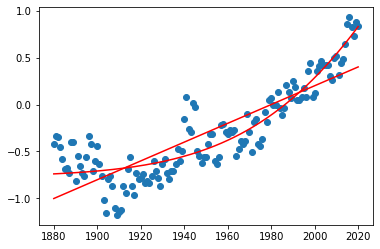

In [14]:
pol=PolynomialFeatures(degree=85)
newx=pol.fit_transform(x)
polmod=LinearRegression()
polmod.fit(newx,y)
polmod.predict(newx)
plt.scatter(x,y)
plt.plot(x, lin.predict(x), color="red")
plt.plot(x,polmod.predict(newx),color="red")
plt.savefig("cmo3.png", transparent=True,bbox_inches='tight')

In [15]:
df_seasurfacetemp=df_seasurfacetemp[['Annual anomaly']]
future_days=15
df_seasurfacetemp['Prediction']=df_seasurfacetemp[['Annual anomaly']].shift(-future_days)
df_seasurfacetemp.tail(4)

Annual anomaly  Prediction
137           0.822         NaN
138           0.732         NaN
139           0.876         NaN
140           0.840         NaN

In [16]:
X=np.array(df_seasurfacetemp.drop(['Prediction'],axis=1))[:-future_days]
y=np.array(df_seasurfacetemp['Prediction'])[:-future_days]

In [17]:
x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.25)

In [18]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)

In [19]:
x_future=df_seasurfacetemp.drop(['Prediction'],axis=1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

array([[0.192],
       [0.048],
       [0.048],
       [0.084],
       [0.174],
       [0.084],
       [0.354],
       [0.444],
       [0.084],
       [0.12 ],
       [0.354],
       [0.408],
       [0.462],
       [0.426],
       [0.426]])

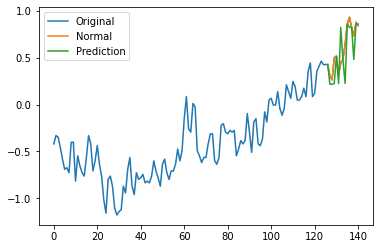

In [20]:
lr_prediction=lr.predict(x_future)
tree_prediction=tree.predict(x_future)
prediction= tree_prediction
valid = df_seasurfacetemp[X.shape[0]:]
valid['Predictions']= prediction
plt.plot(df_seasurfacetemp['Annual anomaly'])
plt.plot(valid['Annual anomaly'])
plt.plot(valid['Predictions'])
plt.legend(['Original','Normal','Prediction'])
plt.savefig("cmo4.png", transparent=True,bbox_inches='tight')

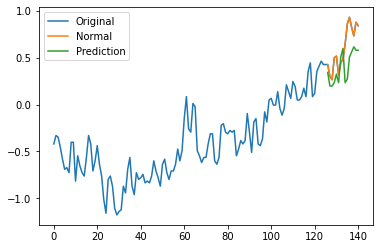

In [21]:
prediction= lr_prediction
valid = df_seasurfacetemp[X.shape[0]:]
valid['Predictions']= prediction
plt.plot(df_seasurfacetemp['Annual anomaly'])
plt.plot(valid['Annual anomaly'])
plt.plot(valid['Predictions'])
plt.legend(['Original','Normal','Prediction'])

In [22]:
df_st = pd.read_csv('sea-surface.csv')

In [23]:
X = df_st.drop('Year', axis = 1)
X = X.drop('Annual anomaly', axis = 1)
Y = df_st[['Annual anomaly']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=90)

In [24]:
svd = TruncatedSVD(n_components=1)
x = svd.fit(X).transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.50, random_state=10)
reg_reduction = LinearRegression()
reg_reduction.fit(X_train, y_train)

LinearRegression()

In [26]:
y_prediction =  reg_reduction.predict(X_test)
svd_score = r2_score(y_test,y_prediction)
svd_score

0.9997423018375298

# Sea Level

In [27]:

df_gmsl.shape
df_gmsl.head(5)

Time  GMSL
0  1993-01-15  -1.6
1  1993-02-15  -3.4
2  1993-03-15   5.5
3  1993-04-15   0.1
4  1993-05-15   5.3

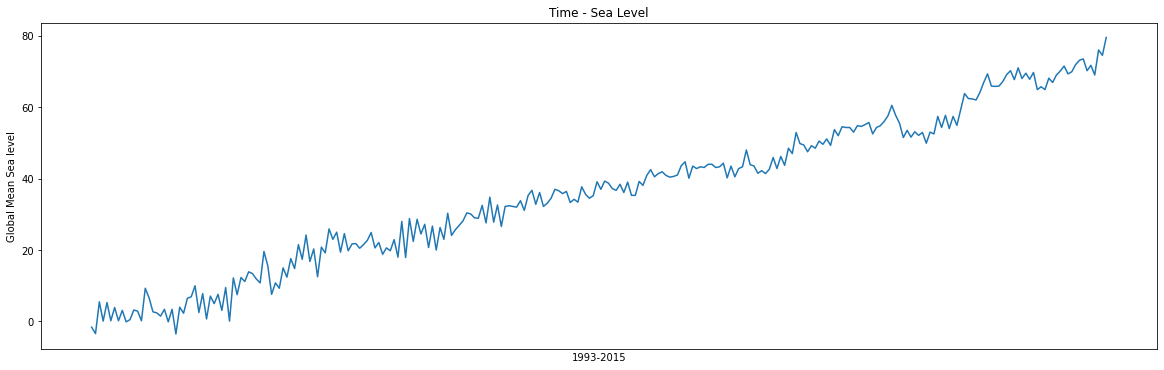

In [28]:
plt.figure(figsize=(20,6))

plt.plot(df_gmsl.Time,df_gmsl.GMSL) #Zamana göre GMSL değerlerinin grafiği
plt.title("Time - Sea Level")

plt.xlabel("1993-2015")
plt.ylabel("Global Mean Sea level")

length=0                                       #çok fazla yıl değeri olduğu için x eksenin karışık ve iç içe geçmiş gözüküyordu.
xmarks=[i for i in range(1,length+1,1)]        #bu yüzden yıl değerleri gizlendi   
plt.xticks(xmarks)
plt.show()

In [29]:
df_gmsl.GMSL.pct_change().sort_values() #Öncelikle, pct_change() fonksiyonu ile deniz seviyesi artma oranlarına bakıyoruz.
                                   #sort_values() fonksiyonu ile oranları sıralıyoruz. Buradan min ve max değerleri ve 
                                   #konumlarını tespit ediyoruz.

21    -35.000000
10     -6.000000
2      -2.617647
23     -2.142857
22     -2.029412
         ...    
6      18.500000
14     45.500000
4      52.000000
37    121.000000
0            NaN
Name: GMSL, Length: 266, dtype: float64

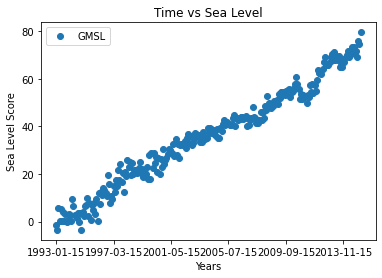

In [30]:
df_gmsl.plot(x='Time', y='GMSL', style='o')
plt.title('Time vs Sea Level')
plt.xlabel('Years')
plt.ylabel('Sea Level Score')
plt.show()

In [31]:
def convert_date_to_ordinal(date):
    return dt.strptime(date, '%Y-%m-%d').toordinal()

df_gmsl['dt_ordinal'] = df_gmsl['Time'].apply(lambda x: convert_date_to_ordinal(x))
df_gmsl

Time  GMSL  dt_ordinal
0    1993-01-15  -1.6      727578
1    1993-02-15  -3.4      727609
2    1993-03-15   5.5      727637
3    1993-04-15   0.1      727668
4    1993-05-15   5.3      727698
..          ...   ...         ...
261  2014-10-15  71.7      735521
262  2014-11-15  69.0      735552
263  2014-12-15  76.0      735582
264  2015-01-15  74.5      735613
265  2015-02-15  79.5      735644

[266 rows x 3 columns]

# Sea Level  Regression Analysis

In [32]:
X= df_gmsl.dt_ordinal.to_numpy().reshape(-1,1)

Y= df_gmsl.GMSL
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
regressor = linear_model.LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
print(regressor.score(x_test,y_test))

0.9741774248834913


In [33]:
print('Coefficients: ', regressor.coef_)

Coefficients:  [0.0088032]


In [34]:
print('Variance score: {}'.format(regressor.score(x_test, y_test)))

Variance score: 0.9741774248834913


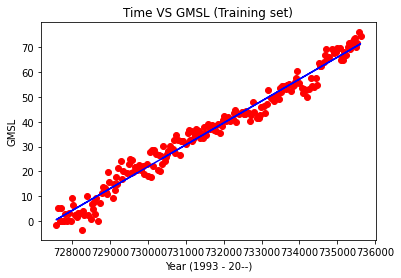

In [35]:
viz_train = plt
viz_train.scatter(x_train, y_train, color='red')
viz_train.plot(x_train, regressor.predict(x_train), color='blue')
viz_train.title('Time VS GMSL (Training set)')
viz_train.xlabel('Year (1993 - 20--)')
viz_train.ylabel('GMSL')
viz_train.show()

# Co2 Emissions 

In [36]:
df = pd.read_csv('out.csv')

df['Date']=df['Date'].str.split(expand=True)[0] # Date verisi object halindeydi. İçinde veri "1990 [YR1990]" bu şekilde bulunuyordu. İlk kısım çekildi.	
df=df.replace('..', np.nan) # Boş veriler .. şeklinde gösteriliyordu. Nan haline getirildi.
df=df.rename(columns={"CO2 emissions from liquid fuel consumption (kt)": "Liquid Co",  # Column isimlerinin düzenlenmesi
                      "CO2 emissions from gaseous fuel consumption (kt)" :"Gaseous Co",
                      "CO2 emissions from solid fuel consumption (kt)" : "Solid Co",
                      "CO2 emissions (kt)":"Total Co"})
s = df.drop('Country Name',axis=1).select_dtypes(include='object').columns  # data type object-> float. Üzerinde işlem yapabilmek için 
df[s] = df[s].astype("float")
df=df.astype({'Date':'int16','Country Name':'str'})
df=df[df['Date']<2016] # Rest of years's data is empty

Text(0, 0.5, 'CO2 emissions from different fuel consumptions')

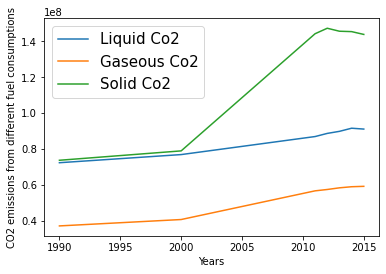

In [37]:
df_ToCo = df[['Date','Total Co','Country Name']]
df_Co = df[['Date','Country Name','Liquid Co','Gaseous Co','Solid Co']]
df_Co.groupby(df_Co['Date']).sum().plot() # Toplam yayılım mı mantıklı yoksa ortalama mı
#Because of the dataset, after 2017 all values Nan. So We plot before this year. 

L=plt.legend(prop={"size":15})
L.get_texts()[0].set_text('Liquid Co2')
L.get_texts()[1].set_text('Gaseous Co2')
L.get_texts()[2].set_text('Solid Co2')
L.FontSize=8

plt.xlabel("Years")
plt.ylabel("CO2 emissions from different fuel consumptions")

In [38]:
df_TotalCo_Turkey=pd.read_excel('Turkey_CO2.xls')
df_TotalCo_Turkey=df_TotalCo_Turkey.transpose()
df_TotalCo_Turkey=df_TotalCo_Turkey.reset_index()
data = zip(df_TotalCo_Turkey[2][1:].tolist(),df_TotalCo_Turkey[5][1:].tolist())
df2 = pd.DataFrame(data, columns = ['Date', 'Fuel combustion'])
df2=df2.astype({'Date':'int16','Fuel combustion':'float64'})
df3=pd.merge(df_Co[df_Co['Country Name']=='Turkey'],df_ToCo[df_ToCo['Country Name']=='Turkey'])
df_Turkey=pd.merge(df3[df3['Country Name']=='Turkey'],df2,on='Date',how='right')

Text(0.5, 0, 'Years')

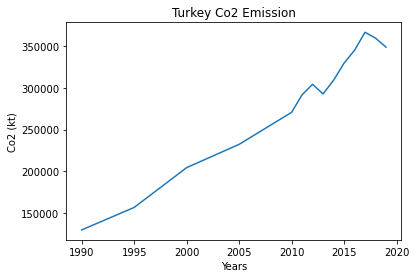

In [39]:
df_Turkey=df_Turkey.set_index('Date')
df_Turkey['Fuel combustion'].plot()
plt.title("Turkey Co2 Emission")
plt.ylabel("Co2 (kt)")
plt.xlabel("Years")

Text(0.5, 0, 'Years')

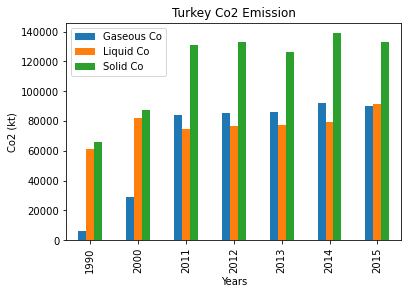

In [40]:
df_Turkey[['Gaseous Co','Liquid Co','Solid Co']].dropna(how='all').plot(kind='bar')
plt.title("Turkey Co2 Emission")
plt.ylabel("Co2 (kt)")
plt.xlabel("Years")

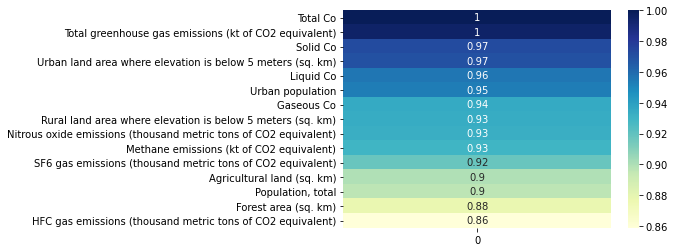

In [41]:
df_corr=df.corr()['Total Co'].sort_values(key=abs,ascending=[False])[:15]
x=np.array((df_corr)).reshape(15,1)
x=pd.DataFrame(x,index=df_corr.index)
dataplot = sns.heatmap(x, cmap="YlGnBu", annot=True)

In [42]:
df_mostco2=df[['Country Name','Date','Total Co']]
df_mostco2=df_mostco2.pivot_table('Total Co',['Country Name'],'Date')
df_perc=df_mostco2
df_mostco2=df_mostco2.sum(axis='columns').sort_values(ascending=[False])[0:90] # Dataset contain not only countries but also specific areas like ' Lower middle income' or 'Early-demographic dividend'. We dont take them
df_mostco2=pd.DataFrame([df_mostco2])


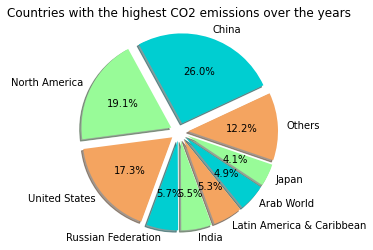

In [43]:
most = df_mostco2[['China','North America','United States','Russian Federation','India','Latin America & Caribbean','Arab World','Japan']].sum(axis=1)
others = df_mostco2['World']-most
top_counties = df_mostco2[['China','North America','United States','Russian Federation','India','Latin America & Caribbean','Arab World','Japan']]
amounts = top_counties.iloc[0]
most = df_mostco2[['China','North America','United States','Russian Federation','India','Latin America & Caribbean','Arab World','Japan']].sum(axis=1)
others = df_mostco2['World']-most
top_counties = df_mostco2[['China','North America','United States','Russian Federation','India','Latin America & Caribbean','Arab World','Japan']]
amounts = top_counties.iloc[0]
Tasks = amounts.append(others)
my_labels = 'China','North America','United States','Russian Federation','India','Latin America & Caribbean','Arab World','Japan','Others'
my_colors = ['darkturquoise','palegreen','sandybrown','darkturquoise','palegreen','sandybrown','darkturquoise','palegreen','sandybrown']
my_explode = (0.1, 0.1, 0.1 ,0.1, 0.1 ,0.1 , 0.1 ,0.1, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=25, shadow = True, colors=my_colors, explode=my_explode,textprops={'fontsize': 10})
plt.title('Countries with the highest CO2 emissions over the years')
plt.axis('equal')

plt.savefig("cmo2.png", transparent=True,bbox_inches='tight')
plt.show()

Text(0.5, 0, 'Countries')

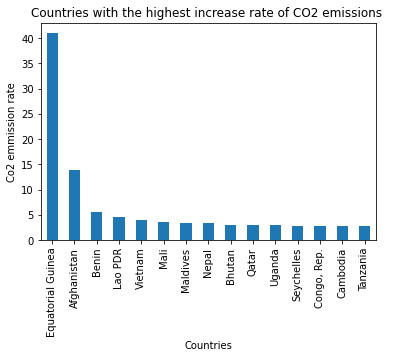

In [44]:
df_perc=df_perc.pct_change(axis='columns')
df_perc.replace([np.inf, -np.inf], np.nan, inplace=True)
df_perc.sum(axis='columns').sort_values(ascending=[False])[:15].plot(kind='bar')
plt.title("Countries with the highest increase rate of CO2 emissions ")
plt.ylabel("Co2 emmission rate")
plt.xlabel("Countries")

In [45]:
df_vis=df.dropna(subset=['Forest area (sq. km)'])
df_vis=df_vis[df_vis['Country Name'].isin(['India','United States','China','Russian Federation','Arab World',
                                           'Japan','Afghanistan','Germany','Canada','Korea, Rep.','Mexico',
                                           'Saudi Arabia','Brazil','Italy','France','Turkey',
                                           'Ukraine','Australia','Spain','Thailand','Malaysia',
                                           'Poland','Argentina','Iraq','Netherlands','Vietnam',
                                           'Chile','Colombia'])]
px.scatter(data_frame = df_vis,
           x='Total Co',
           y='Population, total',
           size='Forest area (sq. km)',
           color='Country Name',
           title='Data visualization',
           labels={'x':'y','s':'d'},
           log_x=True,
           hover_name='Country Name',
           size_max=100,
           animation_frame='Date',)

# Co2 Emissions Regression Analysis

In [46]:
df = pd.read_csv('out.csv')

df['Date']=df['Date'].str.split(expand=True)[0] # Date verisi object halindeydi. İçinde veri "1990 [YR1990]" bu şekilde bulunuyordu. İlk kısım çekildi.	
df=df.replace('..', np.nan) # Boş veriler .. şeklinde gösteriliyordu. Nan haline getirildi.
df=df.rename(columns={"CO2 emissions from liquid fuel consumption (kt)": "Liquid Co",  # Column isimlerinin düzenlenmesi
                      "CO2 emissions from gaseous fuel consumption (kt)" :"Gaseous Co",
                      "CO2 emissions from solid fuel consumption (kt)" : "Solid Co",
                      "CO2 emissions (kt)":"Total Co"})
s = df.drop('Country Name',axis=1).select_dtypes(include='object').columns  # data type object-> float. Üzerinde işlem yapabilmek için 
df[s] = df[s].astype("float")
df=df.astype({'Date':'int16','Country Name':'str'})
df=df[df['Date']<2016] # Rest of years's data is empty
nan_count = df.isnull().sum()
drop_column = nan_count[nan_count<600]
df = df[drop_column.index]
df = df.dropna()

In [47]:
#Columnladan Total Co'nun bileşenlerini çıkardık. Aşağıdaki değerler doğrudan CP2'yi ifade ediyor.
df = df.drop(['Total greenhouse gas emissions (kt of CO2 equivalent)','Solid Co','Liquid Co','Gaseous Co','CO2 emissions (kg per 2015 US$ of GDP)',
              'CO2 emissions (kg per 2017 PPP $ of GDP)','CO2 emissions (kg per PPP $ of GDP)','CO2 emissions (metric tons per capita)',
              'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)','Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)',
              'Methane emissions (kt of CO2 equivalent)'],axis = 1)
dummies = pd.get_dummies(df['Country Name'])
add_dummies = pd.concat([df,dummies],axis='columns')
df_final = add_dummies.drop(['Albania'],axis='columns')

In [48]:
df_final = df_final.sample(frac=1)

X = df_final.drop(['Total Co','Country Name'], axis = 1)
Y = df_final[['Total Co']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,shuffle=False)

 #create a Linear Regression model object 
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)


LinearRegression()

In [49]:
y_prediction =  regression_model.predict(X_test)
# predicting the accuracy score
score = r2_score(y_test,y_prediction)
display(score)

0.9986160685223174

In [50]:
svd = TruncatedSVD(n_components=2)
x = svd.fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.20, random_state=1)
# create a Linear Regression model object
reg_reduction = LinearRegression()

# pass through the X_train & y_train data set
reg_reduction .fit(X_train, y_train)

LinearRegression()

In [51]:
y_prediction =  reg_reduction.predict(X_test)
svd_score = r2_score(y_test,y_prediction)
svd_score

0.9364623514311541

In [52]:
reg_reduction.fit(X_train, y_train)

lst0 = [item[0] for item in X_test]
lst1 = [item[1] for item in X_test]
lst2= np.array(y_test)

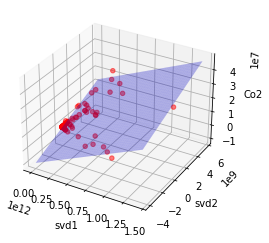

In [53]:
df2 = pd.DataFrame()

df2['x'] = lst0
df2['y'] = lst1
df2['Total Co']= lst2

x_surf, y_surf = np.meshgrid(np.linspace(df2.x.min(), df2.x.max(), 190),np.linspace(df2.y.min(), df2.y.max(), 190))
onlyX = pd.DataFrame({'x': x_surf.ravel(), 'y': y_surf.ravel()})
fittedY=reg_reduction.predict(onlyX)
fittedY = np.array(fittedY)

fittedY = np.array(fittedY)
fittedY = fittedY[:,0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df2['x'],df2['y'],df2['Total Co'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('svd1')
ax.set_ylabel('svd2')
ax.set_zlabel('Co2')
plt.show()

# Global Land Temperature

In [79]:
df_global_old

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  dt_ordinal  
0                                           NaN      638810  
1                                           NaN      638841  
2                                           NaN      638869  
3                                           NaN      638900  
4                                           NaN      638930  
...                                         ...         ...  
3187                                      0.057      735811  
3188                                      0.058      735842  
3189                                      0.062      735872  
3190                                      0.063      735903  
3191                                      0.062      735933  

[3192 rows x 10 columns]

In [54]:
#Describe 
df_global.describe()


LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             3180.000000                        3180.000000   
mean                 8.374731                           0.938468   
std                  4.381310                           1.096440   
min                 -2.080000                           0.034000   
25%                  4.312000                           0.186750   
50%                  8.610500                           0.392000   
75%                 12.548250                           1.419250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count         1992.000000                    1992.000000         1992.000000   
mean            14.350601                       0.479782            2.743595   
std              4.309579                       0.583203            4.155835   
min              5.900000                       0.044000           -5.407000   
25%             10.212000                       0.142000           -1.334500   
50%             14.760000                       0.252000            2.949500   
75%             18.451500                       0.539000            6.778750   
max             21.320000                       4.373000            9.715000   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                    1992.000000                     1992.000000   
mean                        0.431849                       15.212566   
std                         0.445838                        1.274093   
min                         0.045000                       12.475000   
25%                         0.155000                       14.047000   
50%                         0.279000                       15.251000   
75%                         0.458250                       16.396250   
max                         3.498000                       17.611000   

       LandAndOceanAverageTemperatureUncertainty  
count                                1992.000000  
mean                                    0.128532  
std                                     0.073587  
min                                     0.042000  
25%                                     0.063000  
50%                                     0.122000  
75%                                     0.151000  
max                                     0.457000

In [55]:
## Get year values from all date column
def convert(date):
    x = date.split("-")
    return x[0]
df_global['dt'] = df_global['dt'].apply(lambda x: convert(x))

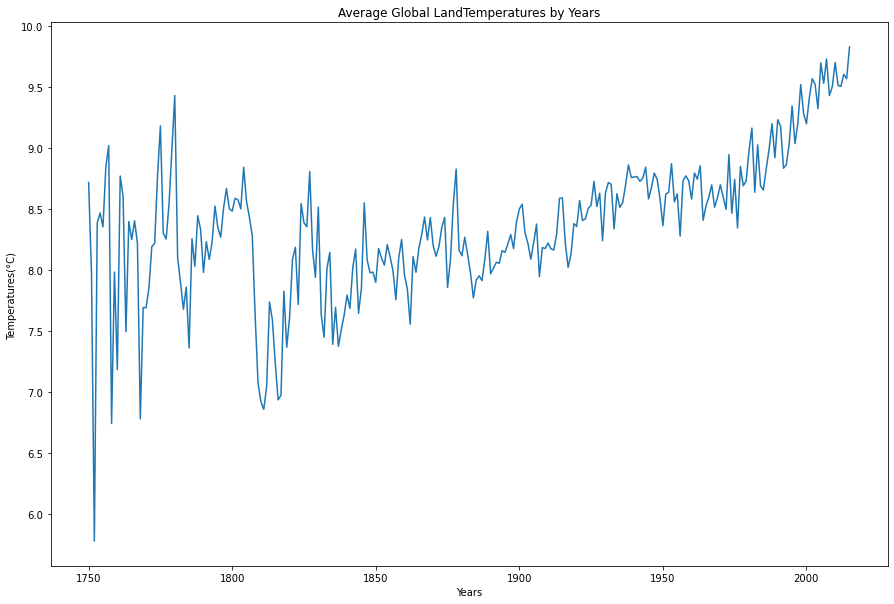

In [56]:
averagetempsbyyear=[]
years=[]
for i in range(1750, 2016):
    averagetempsbyyear.append(df_global.loc[df_global['dt'].values==str(i)]['LandAverageTemperature'].mean())
    years.append(i)
#Plotting the average landtemperature values by years
plt.figure(figsize=(15,10))

plt.xlabel('Years')
plt.title('Average Global LandTemperatures by Years')
plt.ylabel('Temperatures(°C) ')

plt.plot(years,averagetempsbyyear)
plt.savefig("GlobalAverageTemp.png",transparent=True,bbox_inches="tight")

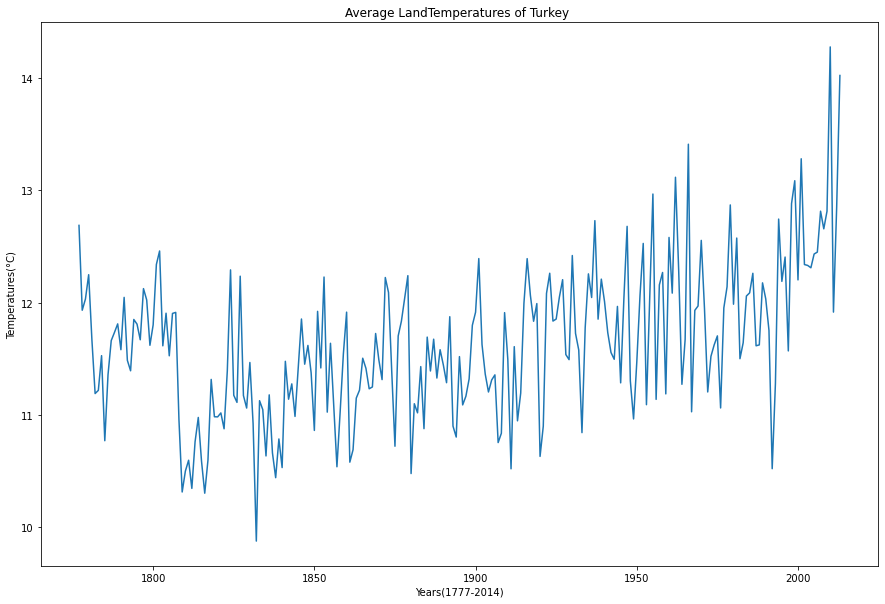

In [57]:
df_Turkey=df_bycountry.loc[df_bycountry['Country'] == "Turkey"]
df_Turkey_old=df_bycountry.loc[df_bycountry['Country'] == "Turkey"]
df_Turkey['dt'] = df_Turkey['dt'].apply(lambda x: convert(x))
averagetempsbyTurkey=[]
years=[]
for i in range(1777, 2014):
    averagetempsbyTurkey.append(df_Turkey.loc[df_Turkey['dt'].values==str(i)]['AverageTemperature'].mean())
    years.append(i)

plt.figure(figsize=(15,10))
plt.plot(years,averagetempsbyTurkey)
plt.xlabel('Years(1777-2014)')
plt.title('Average LandTemperatures of Turkey ')
plt.ylabel('Temperatures(°C)')
plt.savefig("TurkeyAverageLandTemp.png",transparent=True,bbox_inches="tight")
plt.show()

In [58]:
df_global

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750                   3.034                              3.574   
1     1750                   3.083                              3.702   
2     1750                   5.626                              3.076   
3     1750                   8.490                              2.451   
4     1750                  11.573                              2.072   
...    ...                     ...                                ...   
3187  2015                  14.755                              0.072   
3188  2015                  12.999                              0.079   
3189  2015                  10.801                              0.102   
3190  2015                   7.433                              0.119   
3191  2015                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062  

[3192 rows x 9 columns]

In [59]:
df_global_old=pd.read_csv('GlobalTemperatures.csv')
def convert_date_to_ordinal(date):
    return dt.strptime(date, '%Y-%m-%d').toordinal()
df_global_old['dt_ordinal'] = df_global_old['dt'].apply(lambda x: convert_date_to_ordinal(x))
#df_global_old['dt'][0]
df_global_old

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  dt_ordinal  
0                                           NaN      638810  
1                                           NaN      638841  
2                                           NaN      638869  
3                                           NaN      638900  
4                                           NaN      638930  
...                                         ...         ...  
3187                                      0.057      735811  
3188                                      0.058      735842  
3189                                      0.062      735872  
3190                                      0.063      735903  
3191                                      0.062      735933  

[3192 rows x 10 columns]

In [60]:
df_global_old_dropped = df_global_old.drop(["dt",
                                            "LandAverageTemperature",
                                            "LandMaxTemperature",
                                           "LandMaxTemperatureUncertainty",
                                           "LandMinTemperature",
                                           "LandMinTemperatureUncertainty",
                                            "LandAndOceanAverageTemperature",
                                           "LandAndOceanAverageTemperatureUncertainty"], axis=1)



df_global_old_dropped

LandAverageTemperatureUncertainty  dt_ordinal
0                                 3.574      638810
1                                 3.702      638841
2                                 3.076      638869
3                                 2.451      638900
4                                 2.072      638930
...                                 ...         ...
3187                              0.072      735811
3188                              0.079      735842
3189                              0.102      735872
3190                              0.119      735903
3191                              0.100      735933

[3192 rows x 2 columns]

# Global Land Temperature Regression Analysis

In [61]:
df_global_old_dropped['LandAverageTemperatureUncertainty']=df_global_old_dropped['LandAverageTemperatureUncertainty'].fillna(df_global_old_dropped['LandAverageTemperatureUncertainty'].mean())
X=df_global_old_dropped.dt_ordinal.to_numpy().reshape(-1,1)
Y=df_global_old_dropped.LandAverageTemperatureUncertainty

In [75]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

In [76]:
regressionmodel=linear_model.LinearRegression()
regressionmodel.fit(x_train,y_train)

LinearRegression()

In [77]:
y_pred=regressionmodel.predict(x_test)
print(regressionmodel.score(x_test,y_test))

0.653789864629726


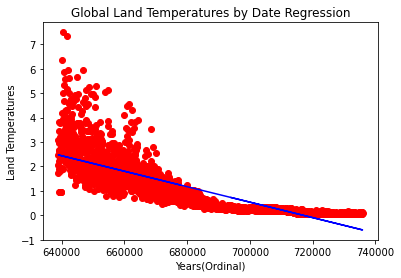

In [65]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressionmodel.predict(x_train), color='blue')
plt.title('Global Land Temperatures by Date Regression')
plt.xlabel('Years(Ordinal)')
plt.ylabel('Land Temperatures')

plt.show()

In [66]:
df_Turkey_old['dt_ordinal'] = df_Turkey_old['dt'].apply(lambda x: convert_date_to_ordinal(x))
df_Turkey_old=df_Turkey_old.fillna(method="ffill")

In [67]:
X_new=df_Turkey_old.dt_ordinal.to_numpy().reshape(-1,1)
Y_new=df_Turkey_old.AverageTemperatureUncertainty

In [68]:
x_trainset,x_testset,y_trainset,y_testset=train_test_split(X_new,Y_new,test_size=0.25)

In [69]:
regression2 = linear_model.LinearRegression()
regression2.fit(x_trainset,y_trainset)

LinearRegression()

In [70]:
y_pred2=regression2.predict(x_testset)
print(regression2.score(x_testset,y_testset))

0.7250564816311503


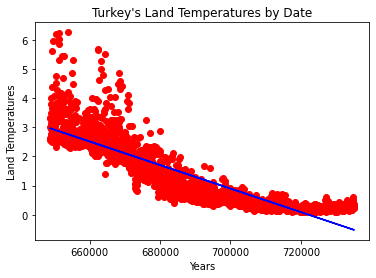

In [71]:
plt.scatter(x_trainset, y_trainset, color='red')
plt.plot(x_trainset,regression2.predict(x_trainset), color='blue')
plt.title("Turkey's Land Temperatures by Date")
plt.xlabel('Years')
plt.ylabel('Land Temperatures')
plt.show()

In [72]:
df_countrycodes['Alpha-3 code']
df_countrycodes['Average_temps']=1

    
tempbycountrycodes=[]
for i in range(0,256):
    tempbycountrycodes.append(df_bycountry.loc[df_bycountry['Country'].values==df_countrycodes['Country'][i]]['AverageTemperature'].mean())

df_countrycodes['Average_temps']=tempbycountrycodes
df_countrycodes=df_countrycodes.fillna(method="ffill")


In [73]:
fig=go.Figure(data=go.Choropleth(
        
        locations=df_countrycodes['Country'],
        z= df_countrycodes['Average_temps'],
        text=df_countrycodes['Country'],
        colorscale='rdylbu',
        locationmode="country names",
        autocolorscale=False,
        reversescale=True,
        marker_line_color='white',
        marker_line_width=.5,
        colorbar_tickprefix='°C',
        colorbar_title='Average Temperatures(°C)'), layout = go.Layout(geo=dict(bgcolor= 'rgba(0,0,0,0)'),
                                  title = 'Average Temperatures between 1743-2013 By Countries',
                                    ),
            
    
             )

In [74]:
fig.show()